In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


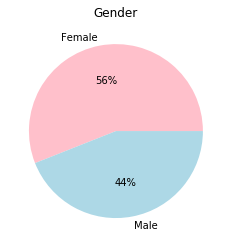

In [4]:
size = df['Gender'].value_counts()

plt.pie(size, colors= ['pink', 'lightblue'], labels= ['Female', 'Male'], autopct= '%.f%%')
plt.title('Gender')
plt.show()

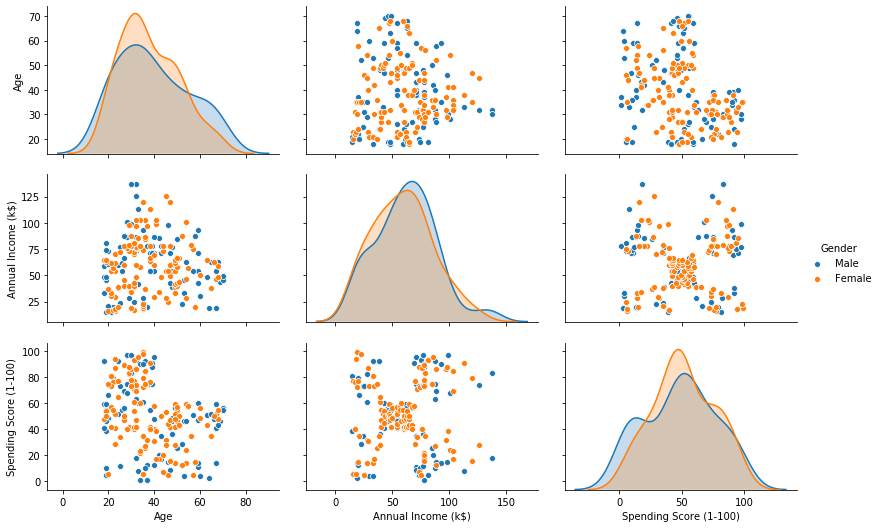

In [30]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [26]:
dp = df.drop('CustomerID', axis=1)

gender = {'Male': 1,'Female': 2} 
dp.Gender = [gender[item] for item in dp.Gender] 

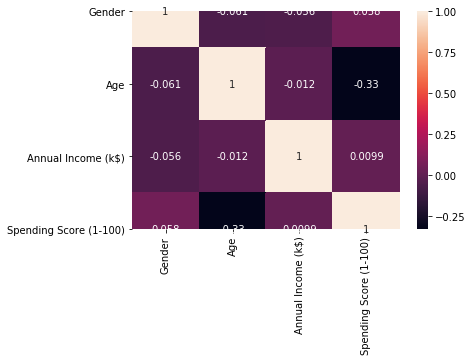

In [13]:
import seaborn as sns

sns.heatmap(dp.iloc[:,0:4].corr(), annot=True)

In [40]:
X= df.iloc[:, [4,3]].values

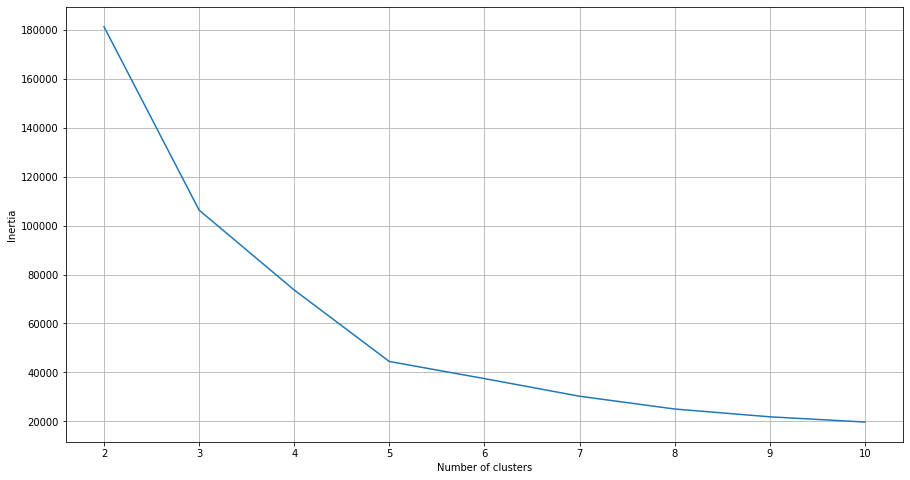

In [15]:
nb_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

inertias = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.grid()

plt.show()

number of clusters: elbow point in 3 or 5 

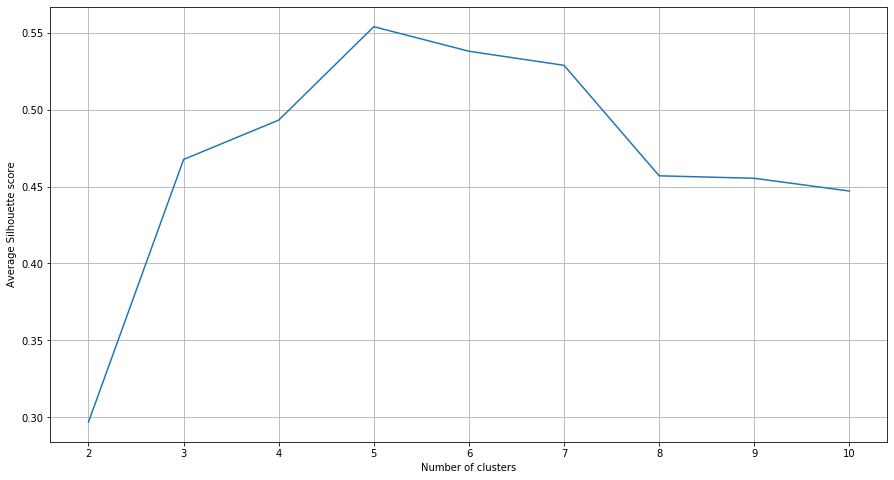

In [16]:
from sklearn.metrics import silhouette_score

nb_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, avg_silhouettes)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette score')
ax.grid()

plt.show()

silhouette scores: highest point in 5

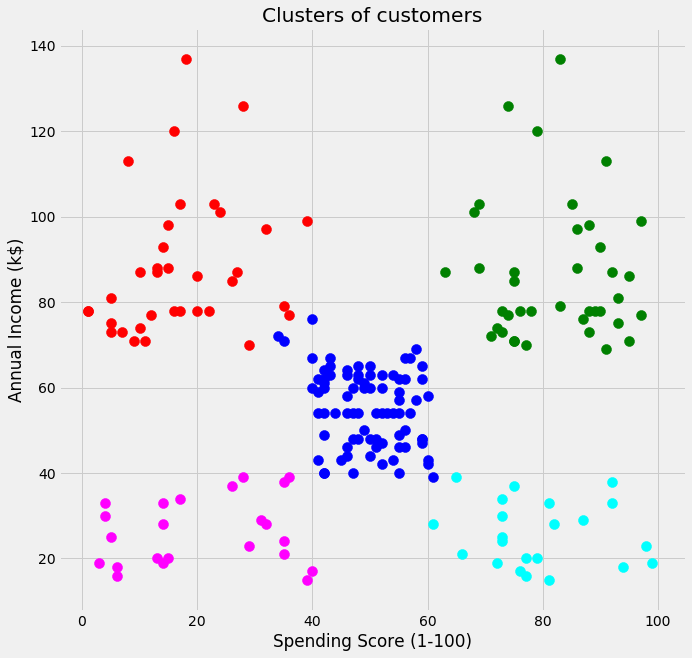

In [10]:
km = KMeans(n_clusters= 5, init='k-means++', random_state=0)

Y_pred = km.fit_predict(X)

plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'red')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'blue')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'green')
plt.scatter(X[Y_pred == 3, 0], X[Y_pred == 3, 1], s = 100, c = 'cyan')
plt.scatter(X[Y_pred == 4, 0], X[Y_pred == 4, 1], s = 100, c = 'magenta')

plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

plt.show()

Text(0.5, 1.0, 'Dendrogram')

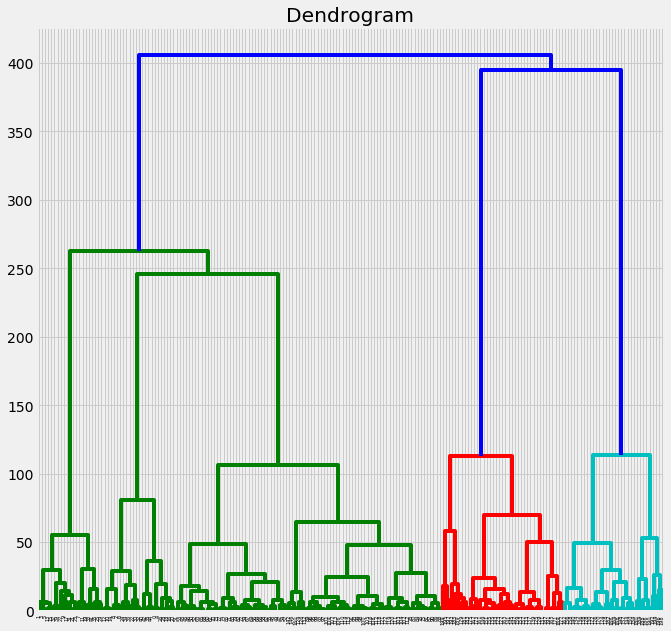

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogram")

/

/

In [35]:
XX = df.iloc[:, [4,2]].values

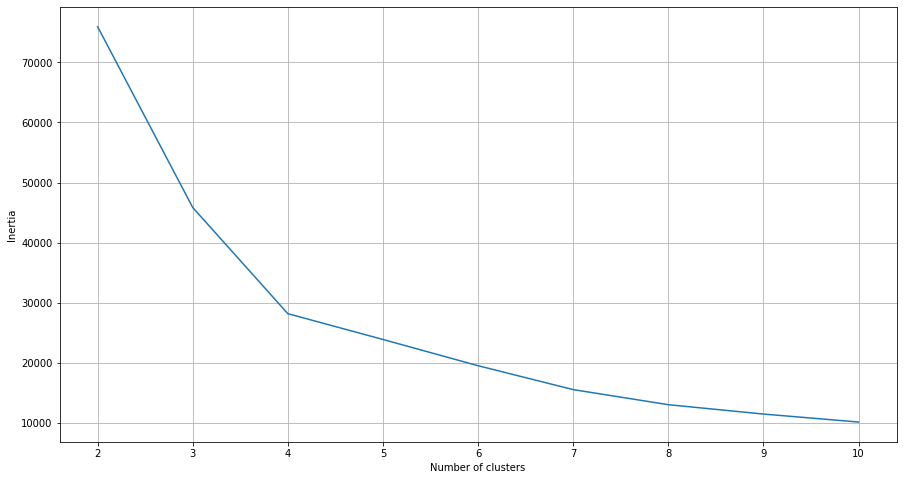

In [36]:
nb_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

inertias = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(XX)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.grid()

plt.show()

number of clusters: elbow point in 3 or 4

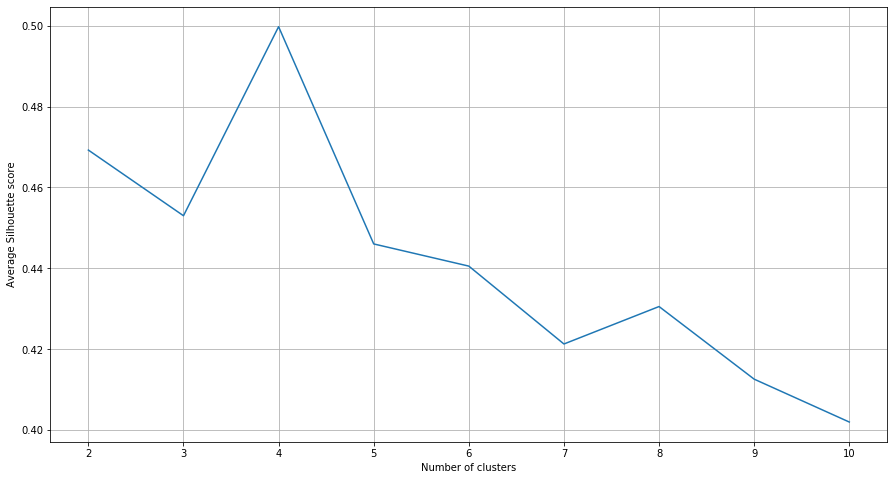

In [37]:
from sklearn.metrics import silhouette_score

nb_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(XX)
    avg_silhouettes.append(silhouette_score(XX, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, avg_silhouettes)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette score')
ax.grid()

plt.show()

silhouette scores: highest point in 4

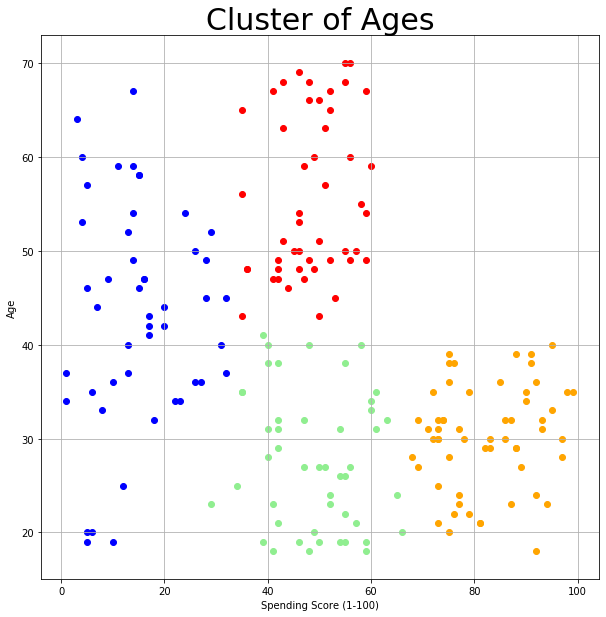

In [38]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(XX)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(XX[ymeans == 0, 0], XX[ymeans == 0, 1], c = 'blue')
plt.scatter(XX[ymeans == 1, 0], XX[ymeans == 1, 1], c = 'orange')
plt.scatter(XX[ymeans == 2, 0], XX[ymeans == 2, 1], c = 'lightgreen')
plt.scatter(XX[ymeans == 3, 0], XX[ymeans == 3, 1], c = 'red')

plt.style.use('fivethirtyeight')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Dendrogram')

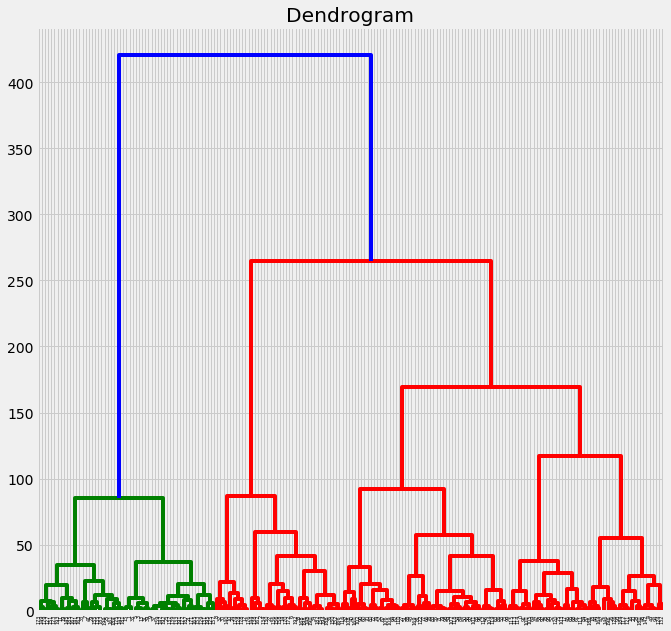

In [43]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(XX,method = 'ward'))
plt.title("Dendrogram2")